In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
#Step 1 Getting and Setting the data
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

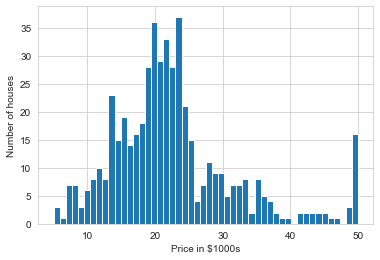

In [6]:
#Step 2 Visualizing current data
plt.hist(boston.target, bins=50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Price in 1000s')

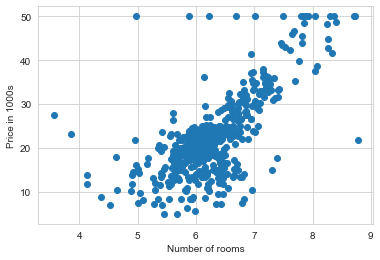

In [7]:
plt.scatter(x=boston.data[:,5], y=boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Price in 1000s')

#Relation between number of rooms and the Price of the house

In [8]:
#The above graph shows that the price of the house increases as the number of rooms increase
#Convert the data to a DataFrame
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


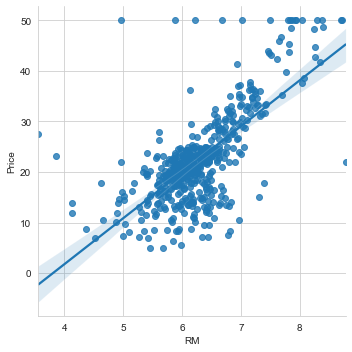

In [11]:
sns.lmplot('RM', 'Price', data=boston_df)

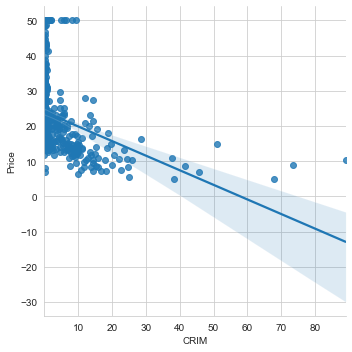

In [12]:
#The above graph shows that the price of the house increases as the number of rooms increase

#Relation between the Crime rate and Price of the house
sns.lmplot('CRIM','Price',data=boston_df)

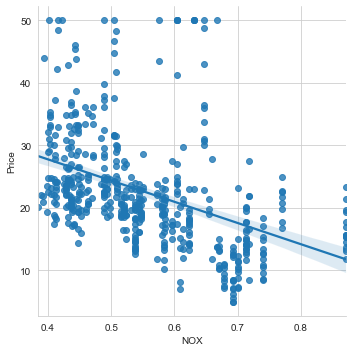

In [13]:
#The above graph shows that the places where crime rate is low, the price of the house is high

#Relation between the concentration of NO2 and the price of the house
sns.lmplot('NOX','Price', data=boston_df)

In [14]:
#The above graph shows that if the concentration of NO2<=0.5, the price of the house is gonna be high
#Most houses are in the place where NO2 is <= 0.6

#Step 5 Using scikit learn to implement multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression

In [15]:
lreg = LinearRegression()

In [16]:
X_multi = boston_df.drop('Price', axis=1)
Y_target = boston_df.Price

In [17]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [19]:
print('The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print('The number of coefficients used is %d' %len(lreg.coef_))

The estimated intercept coefficient is 36.46 
The number of coefficients used is 13


In [20]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [24]:
#The above data shows that the features that mainly decides the price of the house is Number of Rooms and How close is house from the river
#Whereas NO2 level doesn't really affect the price of the house

#Step 6 Split the dataset into training and testing 
import sklearn.model_selection
X = boston_df.RM
X = np.array([[value,1] for value in X])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [25]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [26]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [27]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [28]:
print("Fit a model X_train and calculate the mean squared error with Y_training set: %.2f" %np.mean((Y_train-pred_train)**2))
print("Fit a model X_train and calculate the mean squared error with X_test and Y_test set: %.2f" %np.mean((Y_test-pred_test)**2))

Fit a model X_train and calculate the mean squared error with Y_training set: 47.76
Fit a model X_train and calculate the mean squared error with X_test and Y_test set: 31.35


Text(0.5, 1.0, 'Residual Plot')

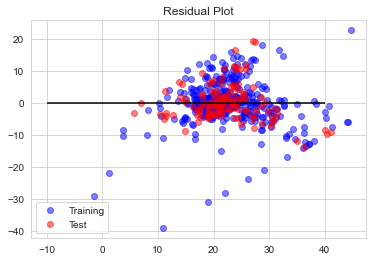

In [30]:
train = plt.scatter(pred_train, (pred_train-Y_train), color='blue', alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), color='red', alpha=0.5)
plt.hlines(y=0, xmin=-10, xmax=40)
plt.legend((train,test), ('Training','Test'), loc='lower left')
plt.title('Residual Plot')